## Imports

In [1]:
import numpy as np
from scipy.special import comb
from scipy.special import factorial
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1.5)

## Notes:

***

***

***
- Anywhere this picture occurs indicates a problem I need to check or finish:


![finish-me.jpg](https://i.pinimg.com/564x/a4/b6/38/a4b638b7d6926e4f494b1d94459052ff.jpg)

***
## Problems

### Key:

- __(w)__ indicates a __word__ problem
- __(f)__ indicates a __formula__ problem
- __(c)__ indicates a __computer__ problem
- __(t)__ indicates a __theoretical__ problem
- 😃 indicates the answer is available in the back

### 7.1 (w)

A chess piece is placed on a chessboard, which consists of an 8x8 array of 64 squares. Specify a numerical sample space $S_{X,Y}$ for the location of the chess piece.

#### Answer:

$S_{X,Y}= \{(x_i, y_j): i=1,2,\dots,8; j=1,2,\dots,8\}$

***
### 7.2 (w)

Two coins are tossed in succession with a head being mapped into a $+1$ and a tail being mapped into a $-1$. If a random vector is defined as $(X,Y)$ with $X$ representing the mapping of the first toss and $Y$ representing the mapping of the second toss, draw the mapping. Also, what is $S_{X,Y}$?

#### Answer:

$S_{X}= \{x_i: i=-1,1\}$,
$S_{Y}= \{y_j: j=-1,1\}$, and 
$S_{X,Y}= \{(x_i, y_j): i=-1,1; j=-1,1\}$.

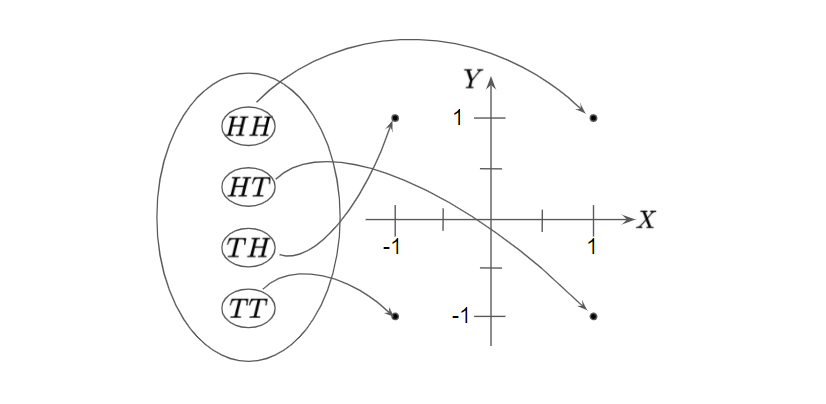

***
### 7.3 😃(w)

A woman has a penny, a nickel, and a dime in her pocket. If she chooses two coins from her pocket in succession, what is the sample space $S$ of possible outcomes? If these outcomes are next mapped into the values of the coins, what is the numerical sample space $S_{X,Y}$?

#### Answer:


$S= \{(p,n),(p,d),(n,p),(n,d),(d,p),(d,n)\}$

$S_{X,Y}= \{(i, j): i=1,5,10; j=1,5,10; i\neq j\} = \{(1,5),(1,10),(5,1),(5,10),(10,1),(10,5)\}$

***
### 7.4 (w)

If $S_{X} = \{1,2\}$ and $S_{Y} =\{3,4\}$, plot the points in the place comprising $S_{X,Y} = S_X\times S_Y$. What is the size of $S_{X,Y}$?

#### Answer:


$S_{X,Y}= S_X\times S_Y =\{(x_i, y_j): i=1,2; j=3,4\} = \{(1,3),(1,4),(2,3),(2,4)\}$ which is of size $4$.

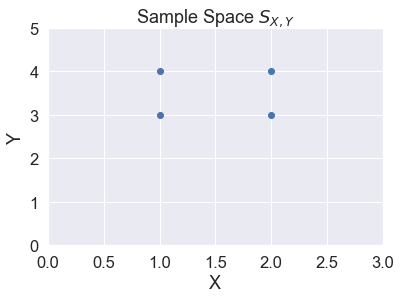

In [38]:
Sx, Sy = [1,2], [3,4]
S = [(x,y) for x in Sx for y in Sy]
x, y = [p[0] for p in S], [p[1] for p in S]

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_ylim([min(y+[0]), max(y)+1])
ax.set_xlim([min(x+[0]), max(x)+1])
ax.set(xlabel='X', ylabel='Y', title=r'Sample Space $S_{X,Y}$')
plt.show()

***
### 7.5 (w)

Two dice are tossed. The number of dots observed on the dice are added together to form the random variable $X$ and also differenced to form $Y$. Determine the possible outcomes of the random vector $(X,Y)$ and plot them in the plane. How many possible outcomes are there?

#### Answer:

Let's make a table of all the possible outcomes of the dice for easier visualization

$D_i$ | 1 | 2 | 3 | 4 | 5 | 6
----------|---|---|---|---|---|-------
**1**    |(1,1)|  (1,2)| (1,3)| (1,4)| (1,5)| (1,6)
**2**    |(2,1)|  (2,2)| (2,3)| (2,4)| (2,5)| (2,6)
**3**    |(3,1)|  (3,2)| (3,3)| (3,4)| (3,5)| (3,6)
**4**    |(4,1)|  (4,2)| (4,3)| (4,4)| (4,5)| (4,6)
**5**    |(5,1)|  (5,2)| (5,3)| (5,4)| (5,5)| (5,6)
**6**    |(6,1)|  (6,2)| (6,3)| (6,4)| (6,5)| (6,6) 

Now the individual sample spaces are $S_X = \{2,3,4,5,6,7,8,9,10,11,12\}$ and $S_Y = \{-5,-4,-3,-2,-1,0,1,2,3,4,5\}$ so the joint sample space (keeping in mind the table of possible outcomes above) is 

$$
\begin{equation}
    \begin{split}
        S_{X,Y} = \{ &(2,0), (3,-1), (4,-2), (5,-3), (6,-4), (7,-5),\\
                  &   (3,1),  (4,0), (5,-1), (6,-2), (7,-3), (8,-4),\\
                  &   (4,2),  (5,1), (6,0), (7,-1), (8,-2), (9,-3),\\
                  &   (5,3),  (6,2), (7,1), (8,0), (9,-1), (10,-2),\\
                  &   (6,4),  (7,3), (8,2), (9,1), (10,0), (11,-1),\\
                  &   (7,5),  (8,4), (9,3), (10,2), (11,1), (12,0) \}
    \end{split} 
\end{equation}
$$

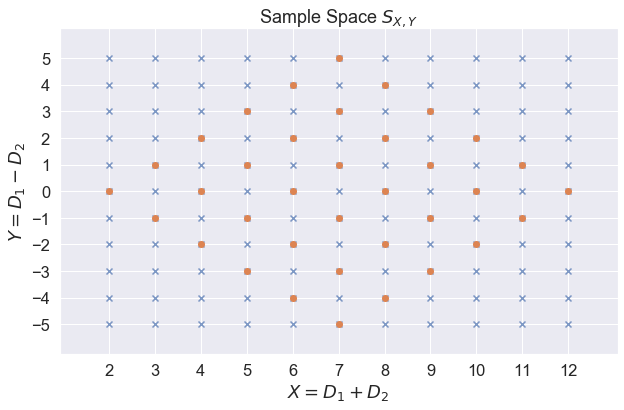

In [45]:
# |S_x X S_y| = 11x11 = 121 which includes many impossible events
Sx, Sy = range(2,13), range(-5,6)
S = [(x,y) for x in Sx for y in Sy]
x, y = [p[0] for p in S], [p[1] for p in S]

# These are only the possible events: |S_XY| = 36
S_possible= [(x+y,x-y) for x in range(1,7) for y in range(1,7)]
x_possible, y_possible = [p[0] for p in S_possible], [p[1] for p in S_possible]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, y, marker='x', alpha=0.7)
ax.scatter(x_possible, y_possible)
ax.set_yticks([*range(min(y), max(y)+1)])
ax.set_xticks([*range(min(x), max(x)+1)])
ax.set(xlabel=r'$X=D_1+D_2$', ylabel=r'$Y=D_1-D_2$', title=r'Sample Space $S_{X,Y}$')
ax.margins(0.1)
plt.show()

***
### 7.6 (f)

A two-dimensional sequence is given by 

$$
p_{X,Y}[i,j] = c(1-p_1)^i(1-p_2)^j
$$

for $i=1,2,\dots$ and $j=1,2,\dots$ , where $p_1\in(0,1),p_2\in(0,1) $ and $c$ is a constant. Find $c$ to make $p_{X,Y}$ a valid joint PMF.

#### Answer:

We just need to check if the joint PMF sums to one over all space:

$$
\begin{equation}
    \begin{split}
        \sum_{i=1}^{\infty} \sum_{j=1}^{\infty} p_{X,Y}[i,j] &= \sum_{i=1}^{\infty} \sum_{j=1}^{\infty} c(1-p_1)^i(1-p_2)^j \\
                                                             \\
                                                             &= c\sum_{i=1}^{\infty}(1-p_1)^i \sum_{j=1}^{\infty} (1-p_2)^j \\ 
                                                             \\
                                                             &= c\bigg(\frac{(1-p_1)}{1-(1-p_1)}\bigg) \bigg(\frac{(1-p_2)}{1-(1-p_2)}\bigg)\\
                                                             \\
                                                                                                                          &= c\bigg(\frac{(1-p_1)}{p_1}\bigg) \bigg(\frac{(1-p_2)}{p_2}\bigg)\\
                                                             \\
                                                             &= 1
    \end{split}
\end{equation}
$$

Now, the coefficient can be found after some minor rearranging:

$$
c = \frac{p_1}{(1-p_1)} \frac{p_2}{(1-p_2)}.
$$

***
### 7.7 (f)

Is

$$
p_{X,Y}[i,j] = \bigg(\frac{1}{2}\bigg)^{i+j} 
$$

for $i=0,1,2,\dots$ and $j=0,1,2,\dots$ a vaild joint PMF?

#### Answer:

We notice that $p_{X,Y}[i,j] \geq 0$ for $\forall i,j$ so now we just need to check if the joint PMF sums to one over all space:

$$
\begin{equation}
    \begin{split}
        \sum_{i=0}^{\infty} \sum_{j=0}^{\infty} p_{X,Y}[i,j] &= \sum_{i=0}^{\infty} \sum_{j=0}^{\infty} \bigg(\frac{1}{2}\bigg)^{i+j} \\
                                                             \\
                                                             &= \sum_{i=0}^{\infty}{ \bigg(\frac{1}{2}\bigg)^{i} } \sum_{j=0}^{\infty}{ \bigg(\frac{1}{2}\bigg)^{j} } \\
                                                             \\
                                                             &= \bigg(\frac{1}{1-\frac{1}{2}}\bigg) \bigg(\frac{1}{1-\frac{1}{2}}\bigg) \\
                                                             \\
                                                             &= 4\\
                                                             \\
                                                             &\neq 1
    \end{split}
\end{equation}
$$

Thus, it is **not** a valid joint PMF.

***
### 7.8 😃 (w)

A single coin is tossed twice. A head outcome is mapped into a $1$ and a tail outcome is mapped into a $0$ to yield a numerical outcome. Next a random vector $(X,Y)$ is defined as

- $X$ = outcome of $1^{st}$ toss $+$ outcome of $2^{nd}$ toss

- $Y$ = outcome of $1^{st}$ toss $-$ outcome of $2^{nd}$ toss

Find the joint PMF for $(X,Y)$, assuming the outcomes $(x_i,y_i)$ are equally likely.

#### Answer:



***
### 7.9 (f)

Find the joint PMF for the experiment described in Example 7.1. Assume each outcome in $S$ is equally likely. How can you check your answer?

#### Answer:



***
### 7.10 (f)

The sample space for a random vector is $S_{X,Y}=\{(i,j): i=1,2,3,4,5; j=1,2,3,4\}$. If the outcomes are equally likely, find $P[(X,Y)\in A]$ where $A = \{(i,j): i\in[1,2], j\in[3,4] \}$.

#### Answer:



***
### 7.11 (f)

A joint PMF is given as 

$$
p_{X,Y}[i,j] = \bigg(\frac{1}{2} \bigg)^{i+j}
$$

for $i=1,2,\dots$ and $j=1,2,\dots$. If $A = \{(i,j): i\in[1,3], j\geq2 \}$ find $P[A]$.

#### Answer:



***
### 7.12 (f)

The values of a joint PMF are given in Table 7.9. Determine the marginal PMFs.

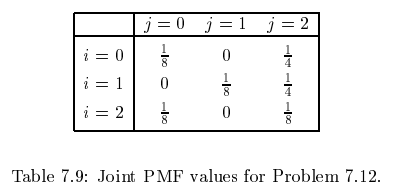

#### Answer:



***
### 7.13 😃 (f)

If a joint PMF is given by 

$$
p_{X,Y}[i,j] = p^2(1-p)^{i+j-2}
$$

for $i=1,2,\dots$ and $j=1,2,\dots$ find the marginal PMFs.

#### Answer:



***
### 7.14 (f)

If a joint PMF is given by $p_{X,Y}[i,j] = \frac{1}{36}$ for $i=1,2,3,4,5,6$ and $j=1,2,3,4,5,6$ find the marginal PMFs.

#### Answer:



***
### 7.15 (w)

A joint PMF is given by 

$$
p_{X,Y}[i,j] = c{10 \choose j}\bigg(\frac{1}{2}\bigg)^{10}
$$

for $i=0,1$ and $j=0,1,2,\dots,10$ where $c$ is some unknown constant. Find $c$ so that the joint PMF is valid and then determine the marginal PMFs. Hint: Recall the binomial PMF.

#### Answer:



***
### 7.16 😃 (w)

Find another set of values for the joint PMF that will yield the same marginal PMFs as given in Table 7.2.

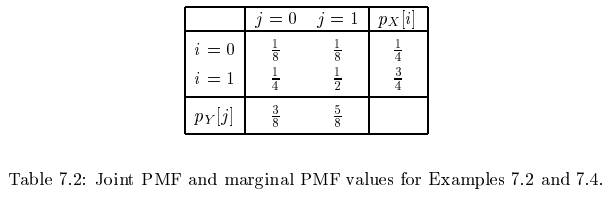

#### Answer:



***
### 7.17 (t)

Prove Properties 7.3 and 7.4 for the joint CDF by relying on the standard properties of probabilities of events.

#### Answer:



***
### 7.18 (w)

Sketch the joint CDF for the joint PMF given in Table 7.2. Do this by shading each region in the $x$-$y$ plane that has the same value.

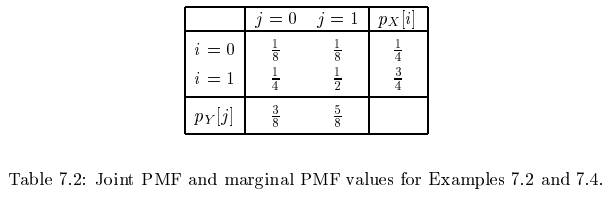

#### Answer:



***
### 7.19 😃 (w)

A joint PMF is given by

$$
\begin{equation}
p_{X,Y}[i,j] = 
    \begin{cases}
        \frac{1}{4}, (i,j)=(0,0) \\
        \frac{1}{4}, (i,j)=(1,1) \\
        \frac{1}{4}, (i,j)=(1,0) \\
        \frac{1}{4}, (i,j)=(1,-1) 
    \end{cases}
\end{equation}
$$

Are $X$ and $Y$ independent?

#### Answer:



***
### 7.20 (t)

Prove that if the random variables $X$ and $Y$ are independent, then the joint CDF factors as $F_{X,Y}(x,y) = F_X(x)F_Y(y)$.

#### Answer:



### 7.21  (t)

A joint PMF is given by

$$
\begin{equation}
p_{X,Y}[i,j] = 
    \begin{cases}
        a, (i,j)=(0,0) \\
        b, (i,j)=(0,1) \\
        c, (i,j)=(1,0) \\
        d, (i,j)=(1,1) 
    \end{cases}
\end{equation}
$$

where of course we must have $a+b+c+d=1$. Show that a necessary condition for the random variables to be independent is $ad=bc$. This can be used to quickly assert that the random variables are not independent as for the case shown in Table 7.5.

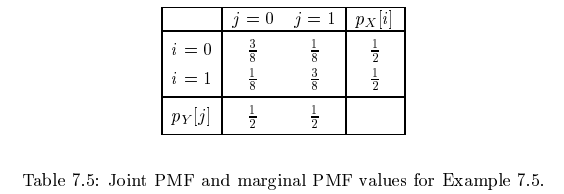

#### Answer:



### 7.22 (f)

If $X\sim Ber(p_X)$ and $Y\sim Ber(p_Y)$, and $X$ and $Y$ are independent, what is the joint PMF?

#### Answer:



### 7.23 😃 (w)

If the joint PMF is given by

$$
p_{X,Y}[i,j] = {10 \choose 1}{11 \choose j}\bigg(\frac{1}{2}\bigg)^{21}
$$

for $i=0,1,\dots,10$ and $j=0,1,\dots,11$ are $X$ and $Y$ independent? What are the marginal PMFs?

#### Answer:



### 7.24 (t)

Assume that $X$ and $Y$ are discretef random variables that take on all integer values and are independent. Prove that the PMF of $Z=X-Y$ is given by

$$
p_Z[l] = \sum_{k=-\infty}^{\infty}p_X[k]p_Y[k-l]
$$

for $l = \dots,-1,0,1,\dots$ by following the same procedure as was used to derive (7.22). Note that the transformation from $(X,Y)$ to $(W,Z)$ is one-to-one. Next show that if $X$ and $Y$ take on nonnegative integer values only, then 

$$
p_Z[l] = \sum_{k=\max{\{0,l\}}}^{\infty}p_X[k]p_Y[k-l]
$$

for $l = \dots,-1,0,1,\dots$.

#### Answer:



### 7.25  (f)

Using the result of Problem 7.24 find the PMF for $Z=X-Y$ if $X\sim Pois(\lambda_X), Y\sim Pois(\lambda_Y),$ and $X$ and $Y$ are independent. Hint: The result will be in the form of infinite sums.

#### Answer:



### 7.26 (w)

Find the PMF for $Z=\max(X,Y)$ if the joint PMF is given in Table 7.5.

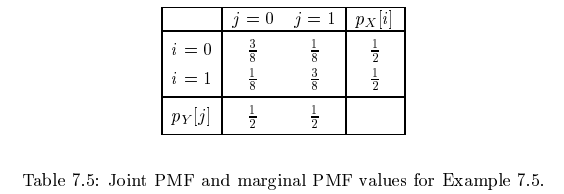

#### Answer:



### 7.27 😃 (f)

If $X\sim Ber(\frac{1}{2}), Y\sim Ber(\frac{1}{2}),$ and $X$ and $Y$ are independent, find the PMF for $Z=X+Y$. Why does the width of the PMF get larger? Does the variance increase?

#### Answer:



### 7.28 (t)

Prove that $\mathbb{E}_{X,Y}[g(X)] = \mathbb{E}_{X}[g(X)]$. Do $X$ and $Y$ have to be independent?

#### Answer:



### 7.29  (t)

Prove that 

$$
\mathbb{E}_{X,Y}[ag(X)+bh(Y)] = a\mathbb{E}_{X}[g(X)] + b\mathbb{E}_{Y}[h(Y)]
$$

#### Answer:



### 7.30 (t)

Prove (7.31):

$$
\mathbb{E}_{X,Y}[g(X)h(Y)] = \mathbb{E}_{X}[g(X)]\mathbb{E}_{Y}[h(Y)]
$$

where $X$ and $Y$ have to be independent.

#### Answer:



### 7.31  (t)

FInd a formula for $var(X-Y)$ similar to (7.33):

$$
var(X+Y) = var(X) + var(Y) + 2\text{cov}(X,Y).
$$

What can you say about the relationship between $var(X+Y)$ and $var(X-Y)$ if $X$ and $Y$ are uncorrelated?

#### Answer:



### 7.32 (f)

Find the covariance for the joint PMF given in Table 7.4. How do you know the value that you obtained is correct?

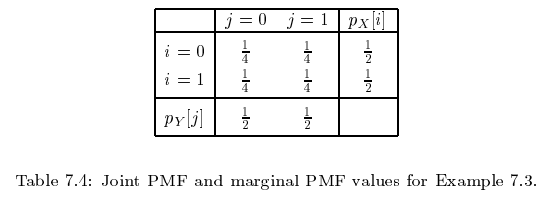

#### Answer:



### 7.33 😃 (f)

Find the covariance for the joint PMF given in Table 7.5.

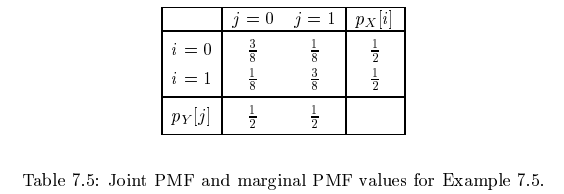

#### Answer:



### 7.34 (t)

Prove the following properties of the covariance

$$
\begin{equation}
    \begin{split}
        \text{cov}(X,Y) &= \mathbb{E}_{X,Y}[XY] - \mathbb{E}_{X}[X]\mathbb{E}_{Y}[Y]\\
        \\
        \text{cov}(X,X) &= var(X) \\
        \\
        \text{cov}(X,Y) &= \text{cov}(Y,X) \\
        \\
        \text{cov}(cX,Y) &= c[\text{cov}(X,Y)] \\
        \\
        \text{cov}(X,cY) &= c[\text{cov}(X,Y)] \\
        \\
        \text{cov}(X,X+Y) &= \text{cov}(X,X) + \text{cov}(X,Y)   \\
        \\
        \text{cov}(X+Y,X) &= \text{cov}(X,X) + \text{cov}(Y,X) 
    \end{split}
\end{equation}
$$

for $c$ a constant.

#### Answer:



### 7.35  (t)

If $X$ and $Y$ have a covariance of $\text{cov}(X,Y)$, we can transform them to a new pair of random variables whose covariance is zero. To do so we let

$$
\begin{equation}
    \begin{split}
       W &= X \\
         \\
       Z &= aX + Y
    \end{split}
\end{equation}
$$

where $a = -\frac{\text{cov}(X,Y)}{var(X)}.$ Show that $\text{cov}(W,Z) = 0$. This process is called **decorrelating the random variables**.

#### Answer:



### 7.36 (f)

Apply the results of Probelm 7.35 to the joint PMF given in Table 7.5. Verify by direct calculation that $\text{cov}(W,Z)=0.$

#### Answer:



### 7.37 😃 (f)

If the joint PMF is given by

$$
p_{X,Y}[i,j] = \bigg(\frac{1}{2}\bigg)^{i+j}
$$

for $i=1,2,\dots$ and $j=1,2,\dots$, compute the covariance.

#### Answer:



### 7.38 😃 (f)

Determine the minimum mean square error for the joint PMF shown in Figure 7.9a. You must evaluate $\mathbb{E}_{X,Y}[\big(Y - \big(\frac{14}{11}X - \frac{1}{11} \big)\big)^2]$.

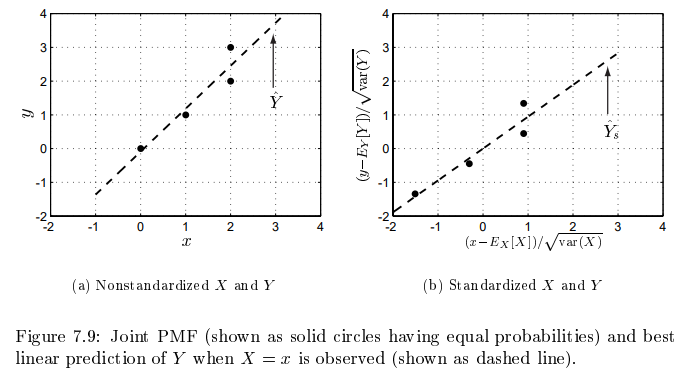

#### Answer:



### 7.39 (t,f)

Prove that the minimum mean square error of the optimal linear predictor is given by

$$
\begin{equation}
\begin{split}
mse_{\min} &= \mathbb{E}_{X,Y}[(Y - (a_{opt}X + b_{opt}Y))^2] \\
           \\
           &= var(Y)(1-\rho_{X,Y}^2)
\end{split}
\end{equation}
$$

Use this formula to check your result for Problem 7.38.

#### Answer:


### 7.40 😃 (w)

In this problem we compare the prediction of a random variable with and without the knowledge of a second random variable outcome. Consider the join PMF shown below. First determine the optimal linear prediction of $Y$

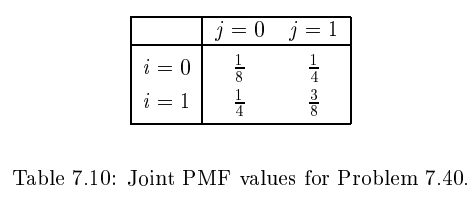

without any knowledge of the outcome of $X$ (see Section 6.6). Also, compute the minimum mean square error. Next, determine the optimal linear prediction of $Y$ based on the knowledge that $X=x$ and compute the minimum mean square error. Plot the predictions versus $x$ in the plane. How do the minimum mean square errors compare?

#### Answer:



### 7.41 😃 (w,c)

For the joint PMF of height and weight shown in Figure 7.1 determine the best linear prediction of weight based on a knowledge of height. 

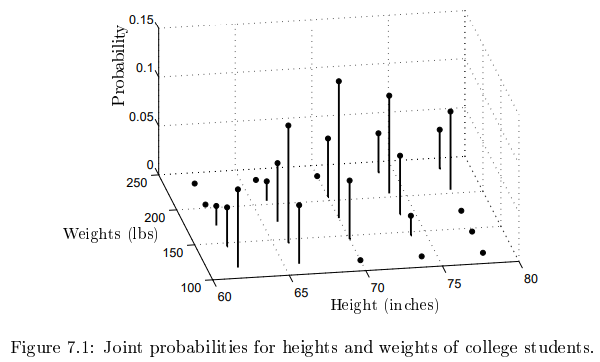

You will need to use Table 4.1 as well as a compute to carry out this problem. Does your answer seem reasonable? Is the prediction of a person's weight if the height is 70 inches reasonable? How about if the height is 78 inches? Can you explain the difference?

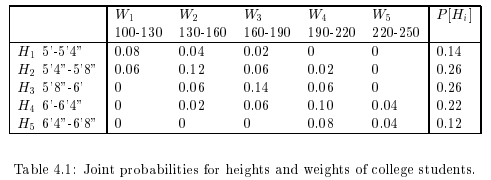

#### Answer:



### 7.42 (f)

Prove that the transformed random variable 

$$
\frac{X - \mathbb{E}_X[X]}{\sqrt{var(x)}}
$$

has an expected value of $0$ and a variance of $1$.

#### Answer:



### 7.43 😃 (w)

The linear prediction of one random variable based on the outcome of another becomes more difficult if noise is present. We model noise as the addition of an uncorrelated random variable. Specifically, assume that we wish to predict $X$ based on observing $X+N$, where $N$ represents the noise. If $X$ and $N$ are both zero mean random variables that are uncorrelated with each other, determine the correlation coefficient between $W=X$ and $Z=X+N$. How does it depend on the power in $X$, which is defined as $\mathbb{E}_X[X^2]$, and the power in $N$, also defined as $\mathbb{E}_N[N^2]$?

#### Answer:



### 7.44 (w)

Consider $var(X+Y)$, where $X$ and $Y$ are correlated random variables. How is the variance of a sum of random variables affected by the correlation between the random variables? Hint: Express the variance of the sum of the random variables using the correlation coefficient.

#### Answer:



### 7.45  (f)

Prove that if $Y=aX+b$, where $a,b$ are constants, then $\rho_{X,Y} = 1$ if $a>0$ and $\rho_{X,Y} = -1$ if $a<0$.

#### Answer:



### 7.46 😃 (w)

If $X\sim Ber(\frac{1}{2}), Y\sim Ber(\frac{1}{2}),$ and $X$ and $Y$ are independent, find the PMF for $Z=X+Y$. Use the characteristic function approach to do so. Compare your results to that of Problem 7.27.

#### Answer:



### 7.47 (w)

Using characteristic functions prove that the binomial PMF has the reproducing property. That is to say, if $X\sim bin(M_X,p), Y\sim bin(M_Y,p),$ and $X$ and $Y$ are independent, then $Z=(X+Y)\sim bin(M_X+M_Y, p)$. Why does this make sense in light of the fact that a sequence of independent Bernoulli trials can be used to derive the binomial PMF?

#### Answer:



### 7.48 😃 (c)

Using the joint PMF shown in Table 7.7 generate realizations of the random vector $(X,Y)$ and estimate its joint and marginal PMFs. Compare your estimated results to the true values.

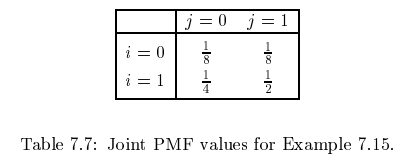

#### Answer:



### 7.49 😃 (c)

For the joint PMF shown in Table 7.7 determine the correlation coefficient. 

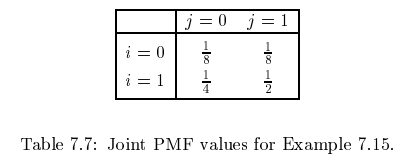

Next use a computer simulation to generate realizations of the random vector $(X,Y)$ and estimate the correlation coefficient as 

$$
\hat\rho_{X,Y} = 
\frac{\frac{1}{M}\sum_{m=1}^{M}{x_my_m - \bar{x}\bar{y}}}
{\sqrt{\big(\frac{1}{M}\sum_{m=1}^{M}{x_m^2 - \bar{x}^2}\big) \big(\frac{1}{M}\sum_{m=1}^{M}{y_m^2 - \bar{y}^2}\big)}}
$$

where

$$
\begin{equation}
    \begin{split}
        \bar{x} &= \frac{1}{M}\sum_{m=1}^{M}{x_m}\\
                \\
        \bar{y} &= \frac{1}{M}\sum_{m=1}^{M}{y_m}
    \end{split}
\end{equation}
$$

and $(x_m,y_m)$ is the $m^{th}$ realization.

#### Answer:



### 7.50 (w,c)

If $X\sim geom(p),$ and $X$ and $Y$ are independent, show that the PMF of $Z=X+Y$ is given by 

$$
p_Z[k] = p^2(k-1)(1-p)^{k-2}
$$

for $k=2,3,\dots$. To avoid errors use the discrete unit step function. Next, for $p=\frac{1}{2}$ generate realizations for $Z$ by first generating realizations of $X$, then generate realizations of $Y$ and adding each pair of realizations together. Estimate the PMF of $Z$ and compare it to the true PMF.

#### Answer:



### 7.51 (w,c)

Using the joint PMF given in Table 7.5 determine the covariance to show that it is nonzero and hence $X$ and $Y$ are correlated. Next, use the procedure of Problem 7.35 to determine the transformed random variables $W$ and $Z$ that are uncorrelated. Verify that $W$ and $Z$ are uncorrelated by estimating the covariance as

$$
\widehat {cov(W,Z)} = \frac{1}{M}\sum_{m=1}^{M}{w_mz_m - \bar{w}\bar{z}}
$$

where

$$
\begin{equation}
    \begin{split}
        \bar{w} &= \frac{1}{M}\sum_{m=1}^{M}{w_m}\\
                \\
        \bar{z} &= \frac{1}{M}\sum_{m=1}^{M}{z_m}
    \end{split}
\end{equation}
$$

and $(w_m,z_m)$ is the $m^{th}$ realization. Be sure to generate the realizations of $W$ and $Z$ as $w_m = x_m$ and $z_m = ax_m + y_m$, where $(x_m,y_m)$ is the $m^{th}$ realization of $(X,Y)$.

#### Answer:
